In [35]:
#importing library
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [36]:
#loading the dataset
df=pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
#loading the dataset
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [38]:
#checking for missing values in the dataset
df.isna().sum().sum()

0

In [40]:
#getting priliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [42]:
#EDA



eda_df=df.copy()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

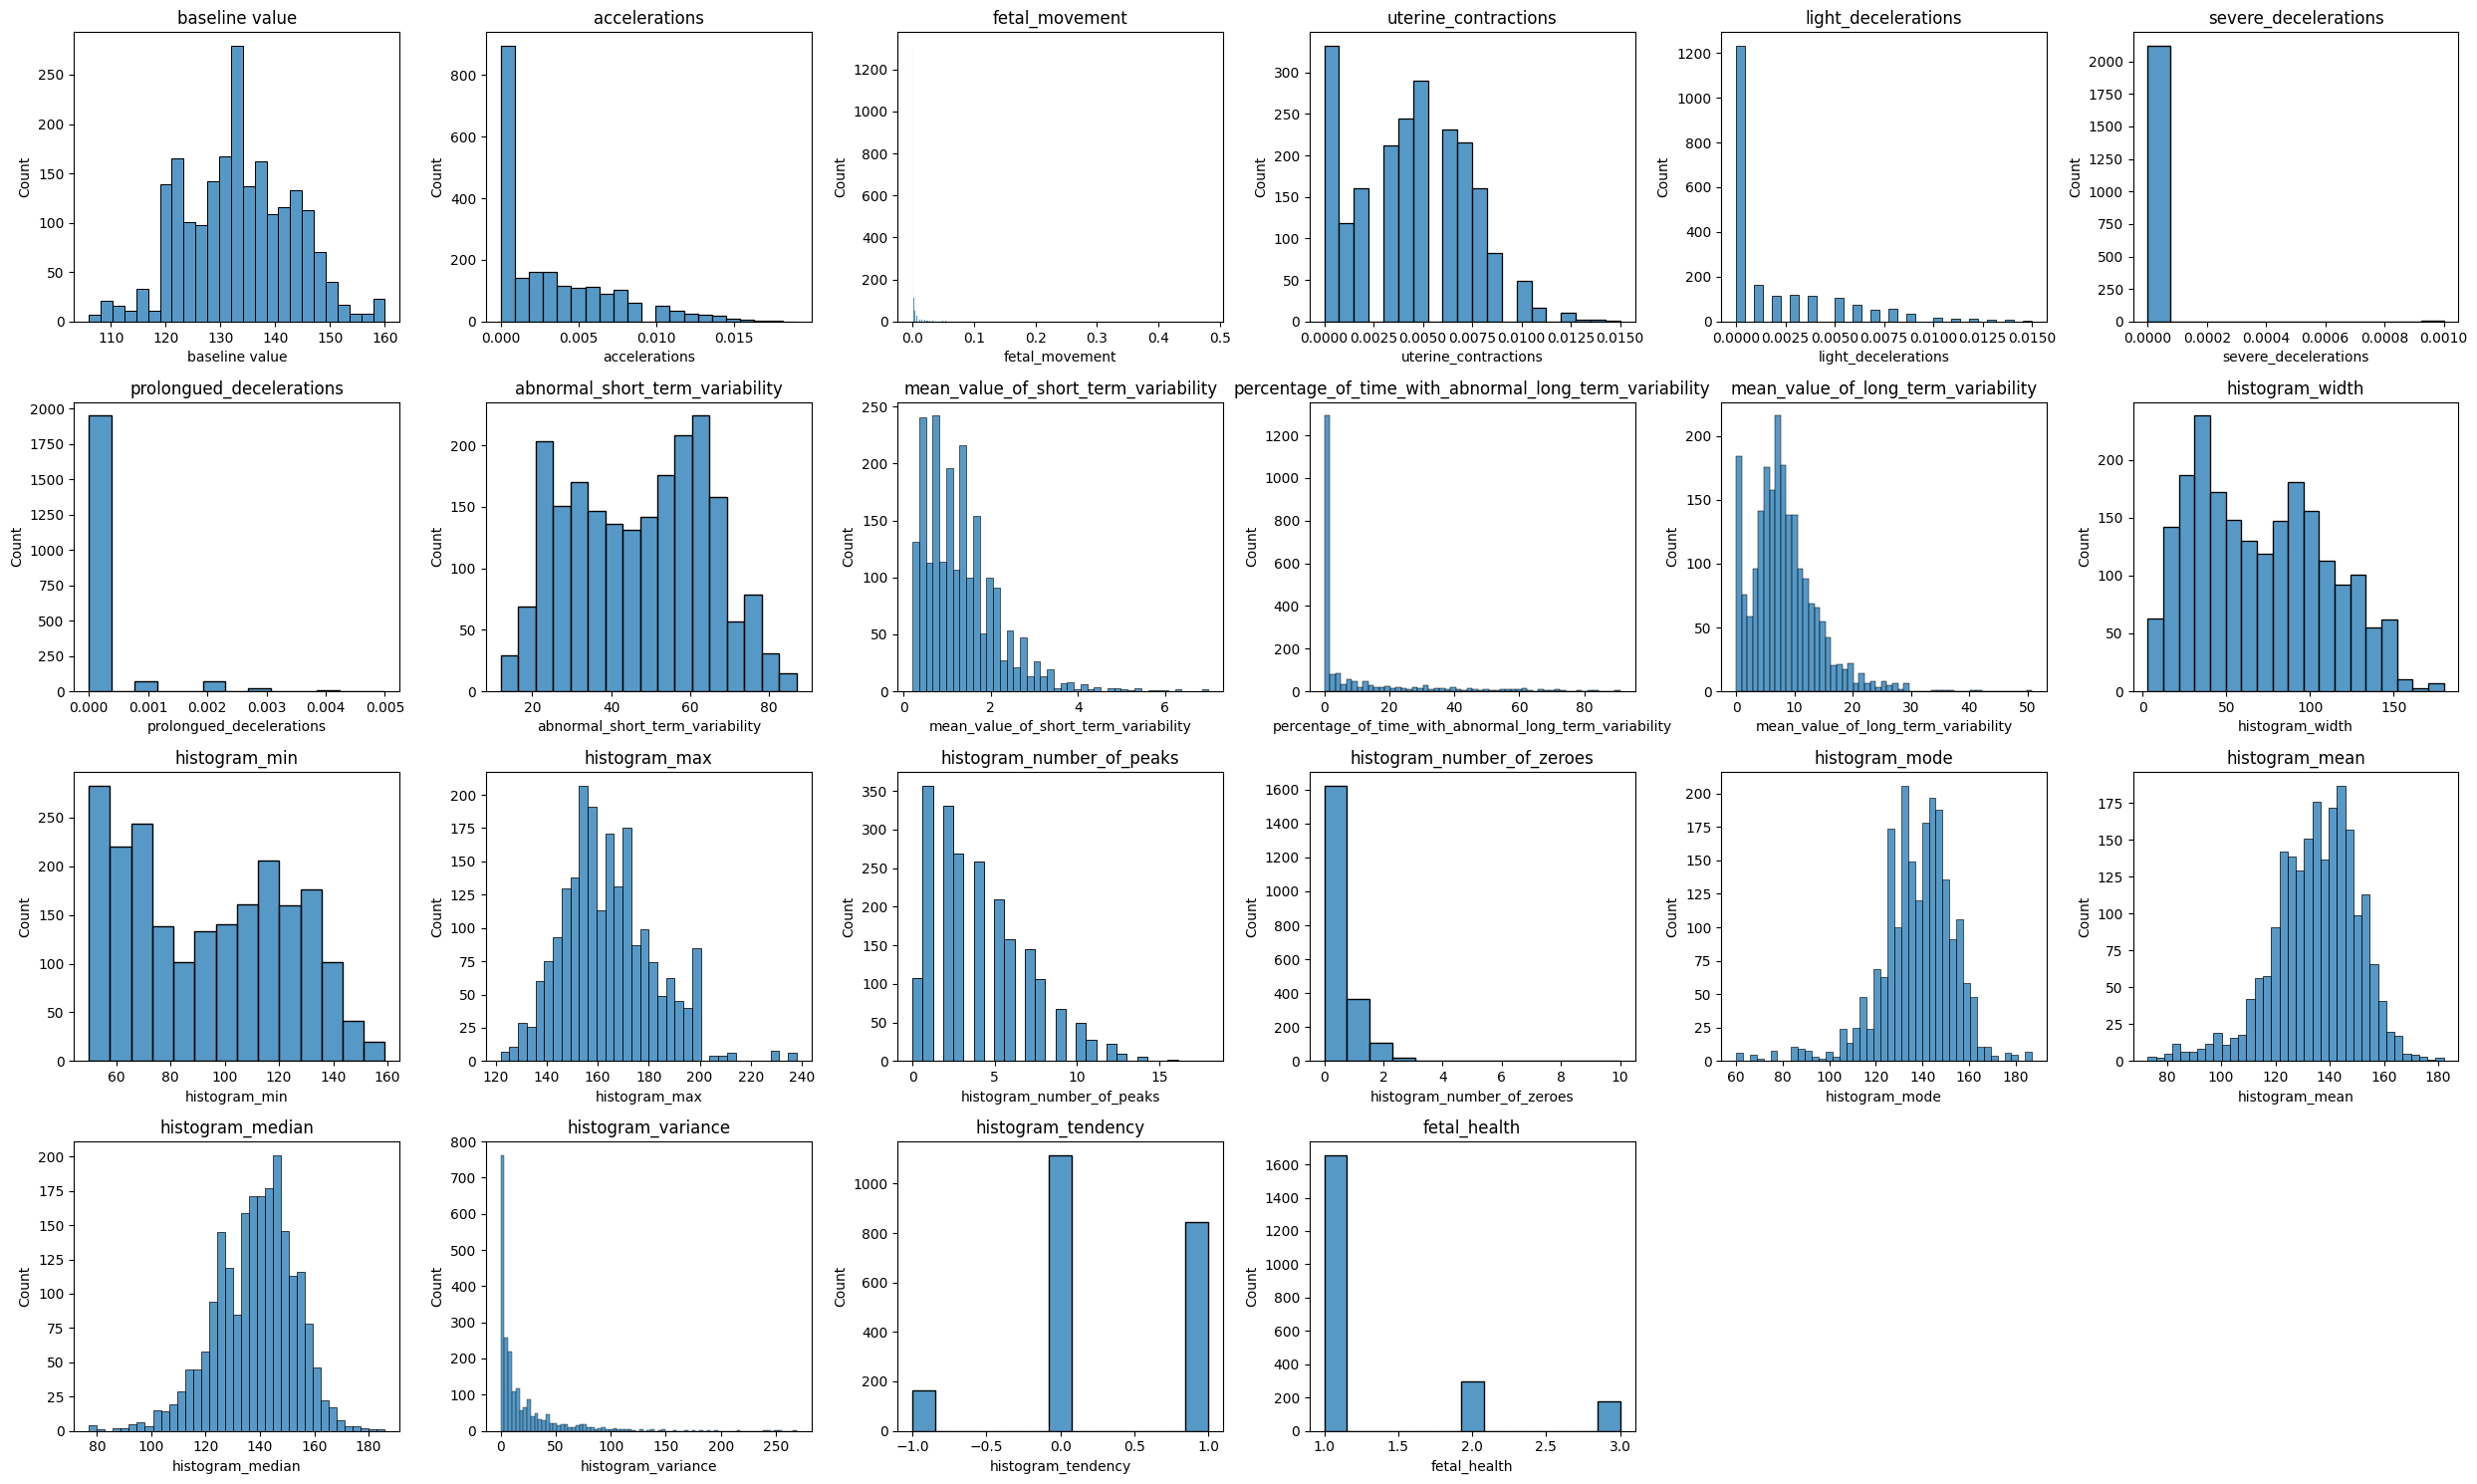

In [43]:
plt.figure(figsize=(25,15))

for i,column in enumerate(eda_df.columns):
    plt.subplot(4,6,i+1)
    sns.histplot(data=eda_df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

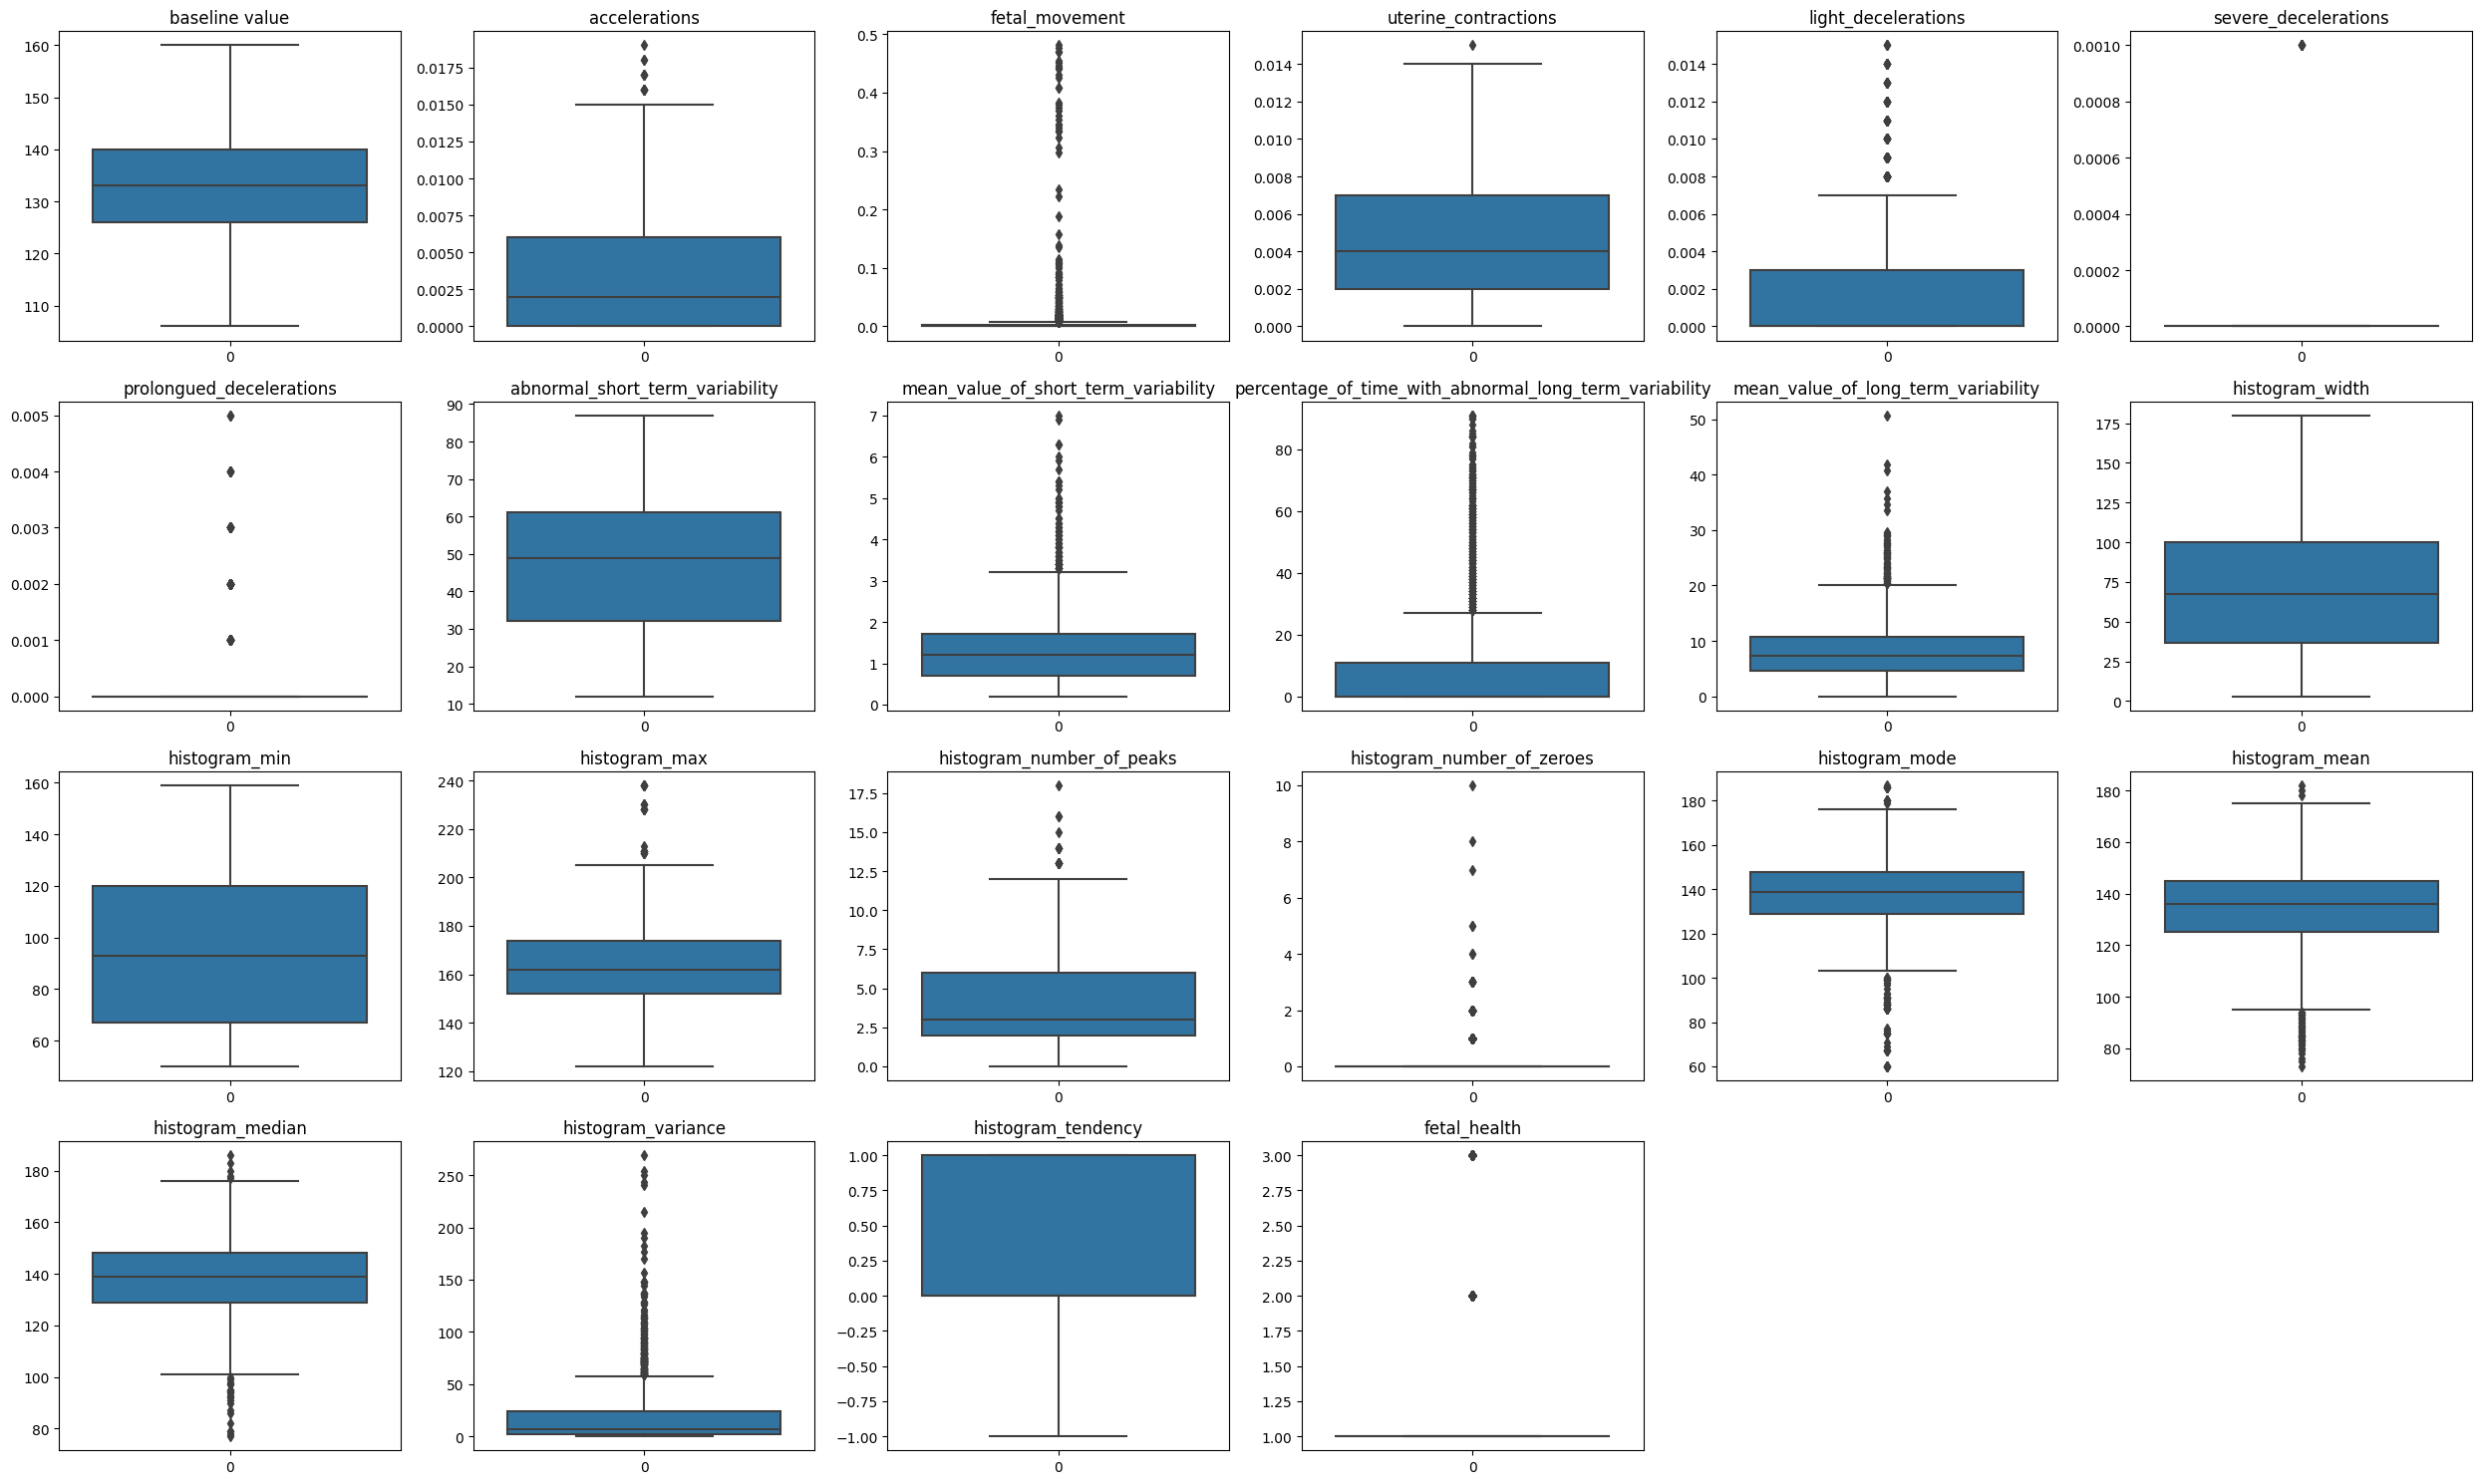

In [45]:
plt.figure(figsize=(25,15))

for i,column in enumerate(eda_df.columns):
    plt.subplot(4,6,i+1)
    sns.boxplot(data=eda_df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

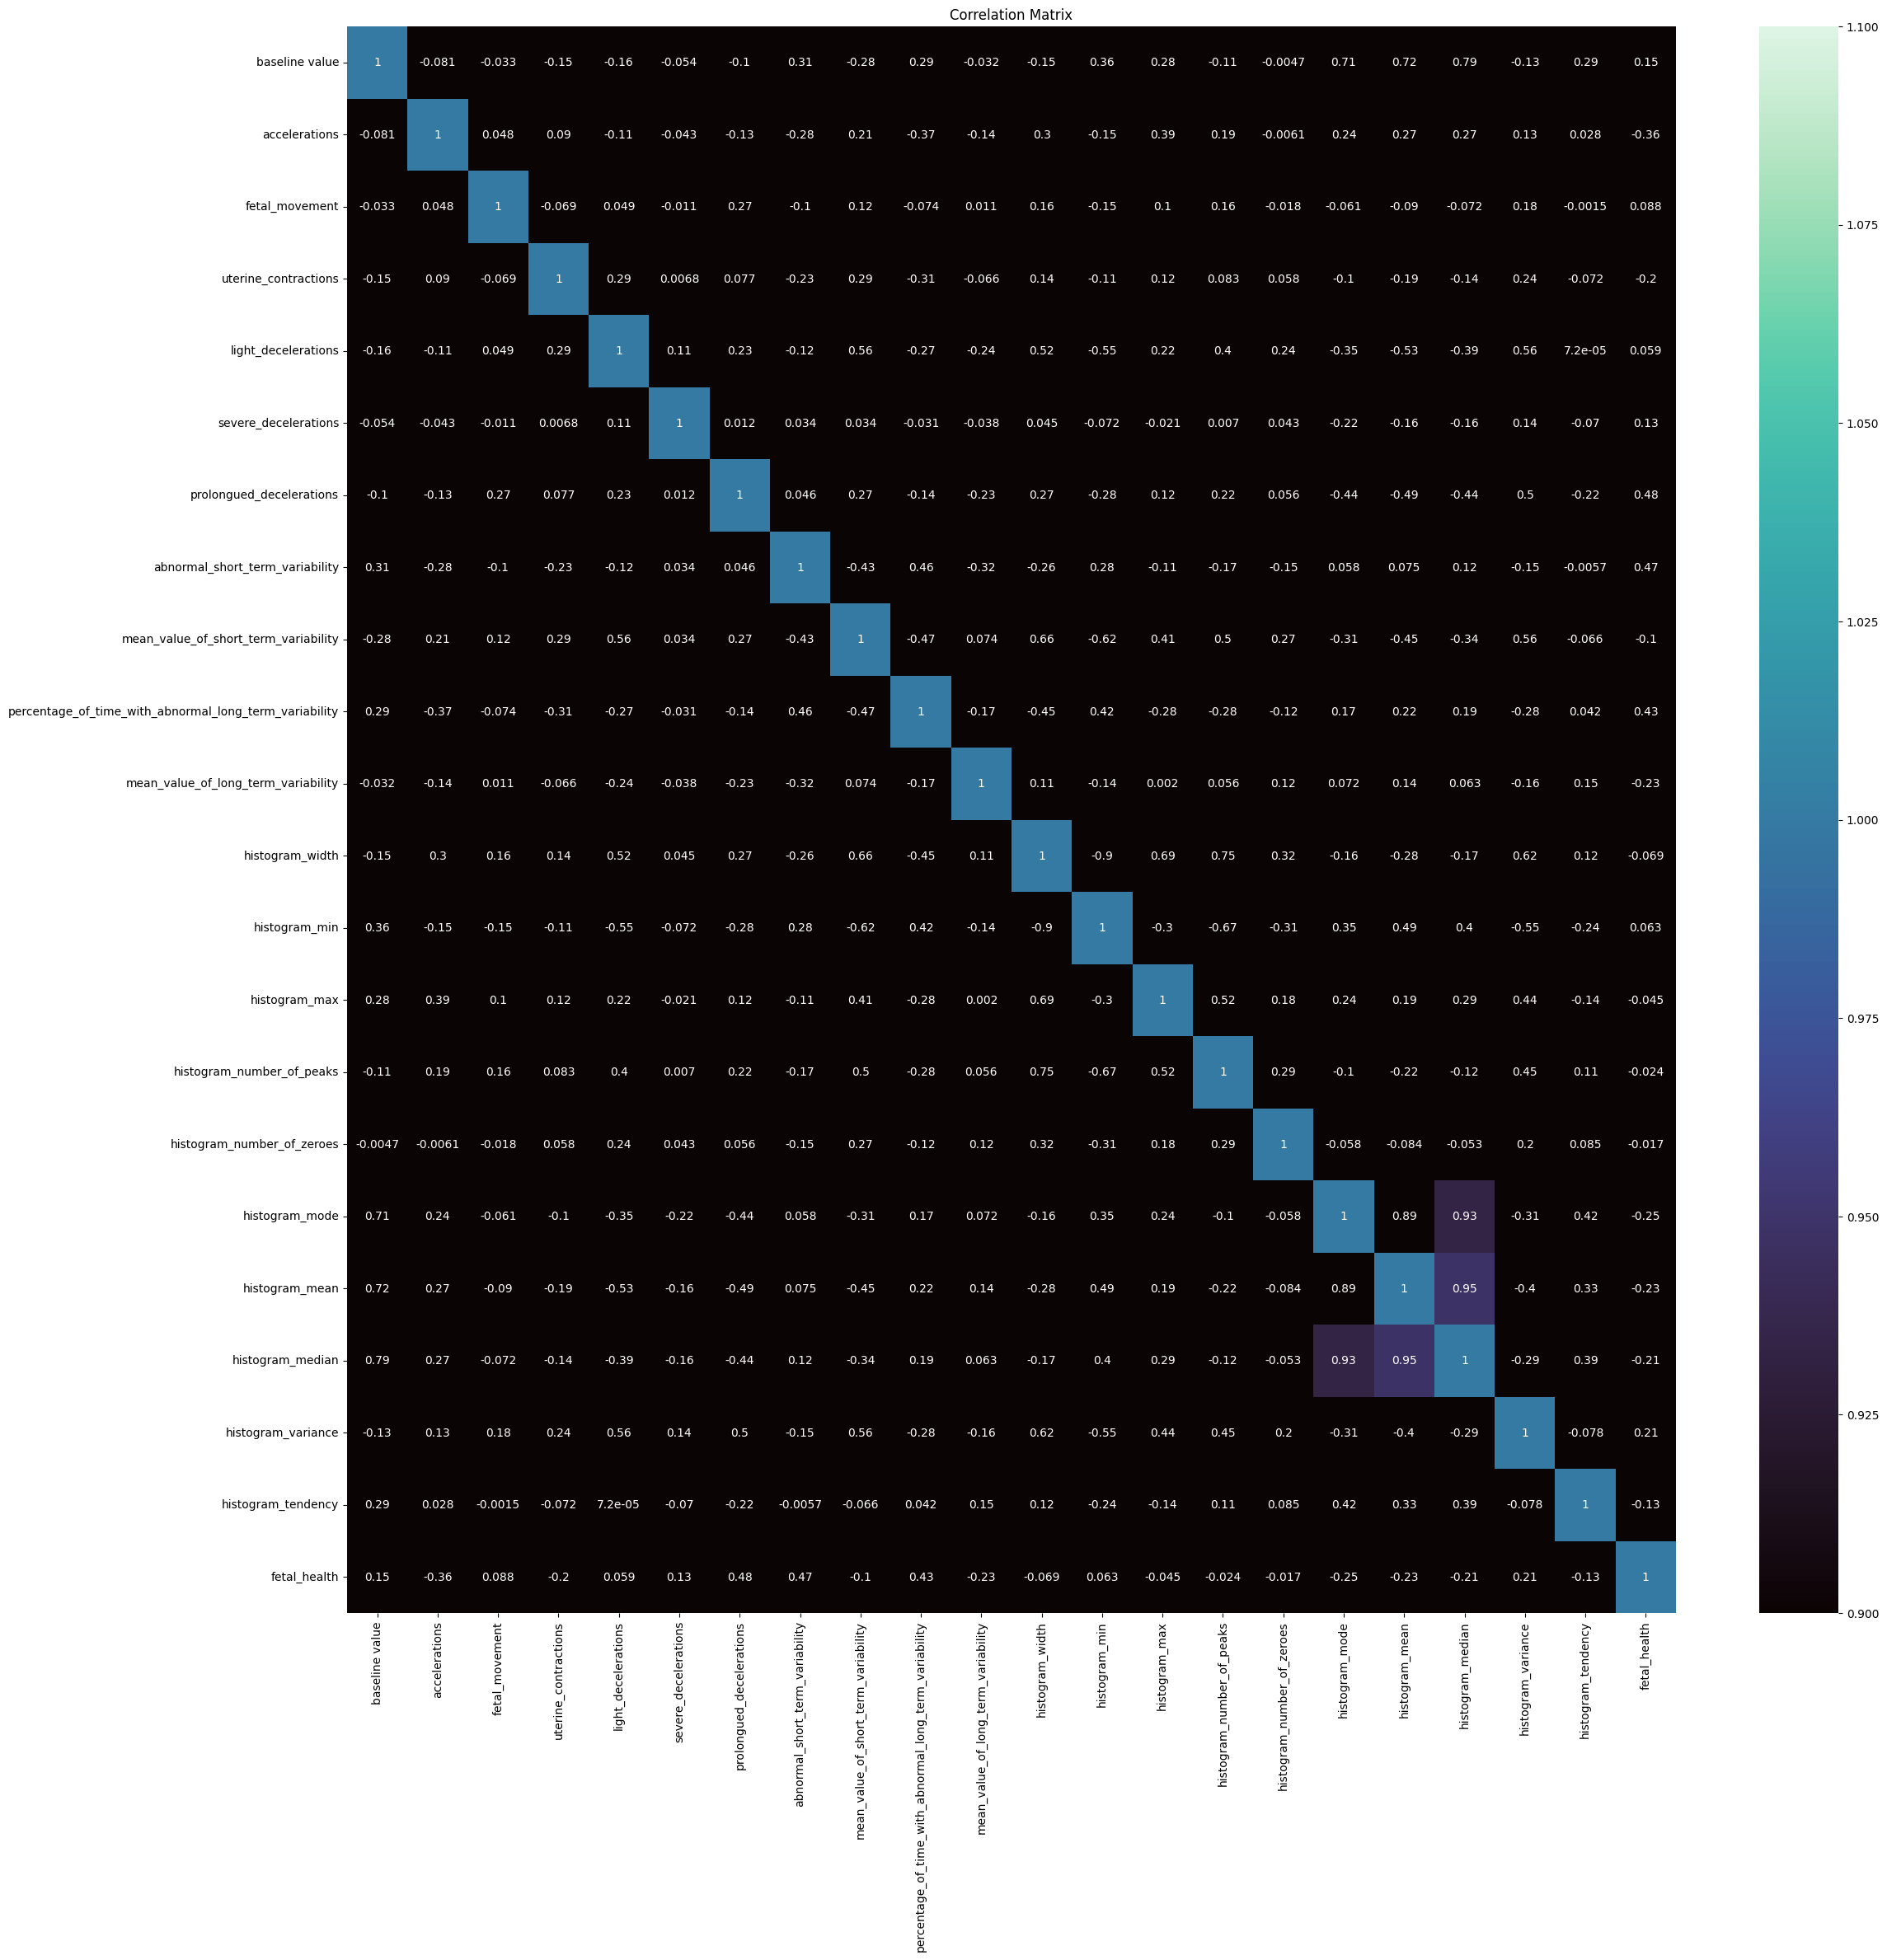

In [46]:
corr=eda_df.corr()
plt.figure(figsize=(26,25))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [47]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [48]:
CLASS_NAME=['NORMAL','SUSPECT','PATHELOGICAL']

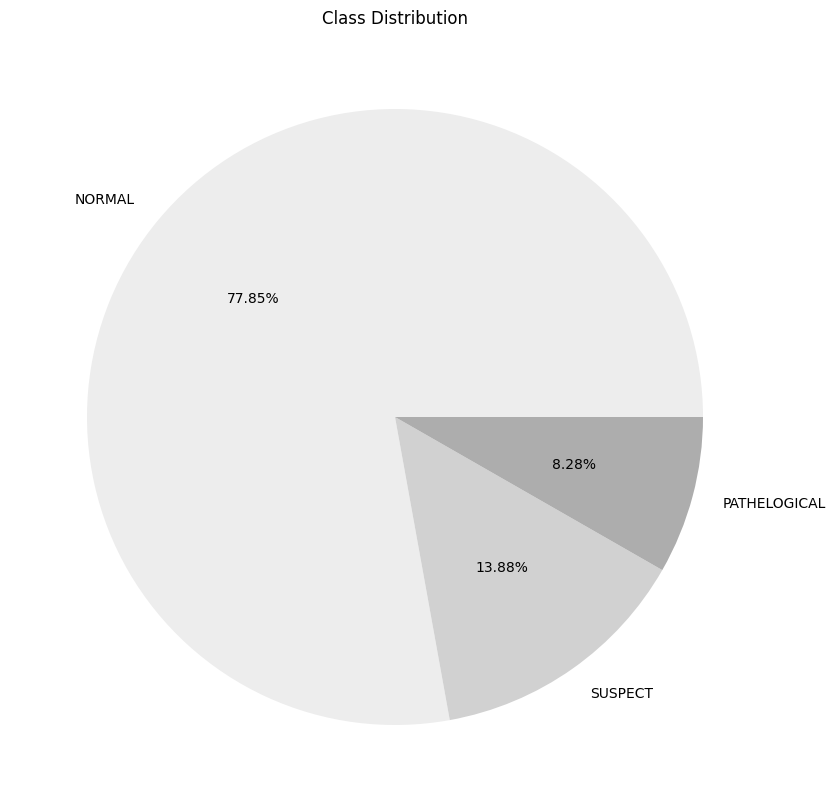

In [49]:
plt.figure(figsize=(10,10))
plt.pie(eda_df['fetal_health'].value_counts(),labels=CLASS_NAME,autopct='%.2f%%',colors=sns.color_palette('Greys'))
plt.title("Class Distribution")
plt.show()

In [50]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [57]:
#preprocessing

def preprocess_inputs(df):
    df=df.copy()
    
    #rename target value
    
    df['fetal_health']=df['fetal_health'].replace({1.0:'NORMAL',2.0:'SUSPECT',3.0:'PATHOLOGICAL'})
    
    y=df['fetal_health']
    x=df.drop('fetal_health',axis=1)
    
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
    
    #scaling the dataset
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
    return x_train,x_test,y_train,y_test

In [58]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
x_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
678,0.679038,1.765013,-0.193215,-1.470707,-0.629096,-0.051917,-0.26365,0.638414,-0.145347,-0.537589,-0.710988,1.423553,-1.070163,1.337561,-0.013643,-0.435470,2.377196,1.899836,2.159117,0.303870,1.118863
512,2.096019,-0.048042,-0.123029,-0.447766,-0.629096,-0.051917,-0.26365,0.521316,-0.822270,-0.483743,0.167548,-0.990100,1.556898,0.400123,-1.012060,-0.435470,1.449964,1.640547,1.668383,-0.573631,1.118863
613,1.286315,1.506005,-0.123029,-1.129727,-0.629096,-0.051917,-0.26365,-0.356922,0.644396,-0.537589,3.347847,1.525181,-1.474327,0.896414,0.984774,-0.435470,1.017255,1.121971,1.177649,-0.012030,1.118863
831,1.893593,-0.825065,-0.193215,-0.788746,0.046541,-0.051917,-0.26365,0.814062,-0.935091,2.747002,-0.851554,-0.227893,0.176007,-0.206454,-0.013643,3.548009,1.326333,1.316437,1.387964,-0.503430,1.118863
369,0.476612,-0.825065,-0.006053,-1.129727,0.046541,-0.051917,-0.26365,0.989710,-1.047911,1.077784,-0.219008,-0.736031,0.815932,-0.261598,-0.679255,-0.435470,0.399100,0.538572,0.476600,-0.468330,-0.537722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.071760,-0.825065,-0.193215,0.916156,2.073452,-0.051917,-0.26365,-1.586455,0.870037,-0.537589,-0.008160,1.144077,-1.474327,0.069263,0.984774,2.220183,-0.713578,-1.146802,-0.855393,1.567471,-0.537722
1147,-1.142794,-0.825065,-0.193215,0.575175,2.411270,-0.051917,-0.26365,-1.703553,0.644396,-0.537589,0.097265,-0.659810,-0.093436,-1.585040,-0.013643,-0.435470,-0.713578,-1.146802,-1.205917,0.023070,1.118863
1766,-1.345220,-0.825065,-0.193215,0.234195,1.397815,-0.051917,1.60450,0.872611,0.193114,-0.537589,0.185118,0.381871,-0.834402,-0.537315,-0.013643,0.892356,-3.186198,-2.183955,-2.818329,1.602571,-2.194308
1122,-1.142794,-0.566057,-0.193215,0.234195,-0.291278,-0.051917,-0.26365,-1.527906,0.418755,-0.537589,1.010942,-0.837658,0.378088,-1.199036,-1.012060,-0.435470,-0.775394,-0.757869,-0.925498,-0.538531,-0.537722


In [60]:
x_train.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03
mean,8.905660e-16,-8.595275e-17,-4.655774e-17,5.252668e-17,-1.910061e-17,-3.581365e-17,6.446456e-17,1.240047e-16,-2.865092e-17,7.162729e-18,5.013910e-17,2.745713e-17,-2.184632e-16,-3.103849e-16,-9.550306e-18,1.193788e-17,7.019475e-16,2.387576e-16,8.977287e-16,-2.387576e-17,-1.432546e-17
std,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00
min,-2.762201e+00,-8.250651e-01,-1.932148e-01,-1.470707e+00,-6.290960e-01,-5.191741e-02,-2.636502e-01,-2.054849e+00,-1.273552e+00,-5.375892e-01,-1.448958e+00,-1.701492e+00,-1.474327e+00,-2.301904e+00,-1.344866e+00,-4.354700e-01,-4.793400e+00,-3.998973e+00,-4.150322e+00,-6.438306e-01,-2.194308e+00
25%,-7.379428e-01,-8.250651e-01,-1.932148e-01,-7.887462e-01,-6.290960e-01,-5.191741e-02,-2.636502e-01,-8.838647e-01,-7.094499e-01,-5.375892e-01,-6.407053e-01,-8.630652e-01,-9.017621e-01,-7.027451e-01,-6.792546e-01,-4.354700e-01,-5.281319e-01,-6.282252e-01,-6.450780e-01,-5.736305e-01,-5.377222e-01
50%,-2.945241e-02,-3.070495e-01,-1.932148e-01,-1.067855e-01,-6.290960e-01,-5.191741e-02,-2.636502e-01,1.114717e-01,-1.453474e-01,-5.375892e-01,-1.311545e-01,-7.545225e-02,-2.607505e-02,-9.616745e-02,-3.464489e-01,-4.354700e-01,9.002295e-02,8.481759e-02,5.597083e-02,-3.981304e-01,-5.377222e-01
75%,7.802509e-01,7.289816e-01,-1.230292e-01,5.751752e-01,3.843593e-01,-5.191741e-02,-2.636502e-01,8.140621e-01,4.187552e-01,5.471424e-02,4.662498e-01,7.693261e-01,8.832923e-01,5.655536e-01,6.519681e-01,-4.354700e-01,6.463623e-01,6.682163e-01,6.869148e-01,1.634698e-01,1.118863e+00
max,2.703296e+00,3.837075e+00,1.105988e+01,3.303018e+00,4.438181e+00,1.926136e+01,9.077100e+00,2.336341e+00,6.398242e+00,4.362375e+00,7.459395e+00,2.693896e+00,2.062102e+00,4.094732e+00,4.645636e+00,1.284279e+01,3.057166e+00,2.936989e+00,3.140586e+00,8.798074e+00,1.118863e+00


In [73]:
models={'Logistic Regression':LogisticRegression(),
           'K-Nearest Classifier':KNeighborsClassifier(),
            'Decision Tree Classifier':DecisionTreeClassifier(),
           'Neural Network':MLPClassifier(),
           'Random Forest':RandomForestClassifier(),
           'Gradient Boosting':GradientBoostingClassifier(),
          
           'LightGBM':LGBMClassifier(),
           'CatBoost':CatBoostClassifier(verbose=0)}

In [74]:
for name,model in models.items():
    print(name)
    print(model)

Logistic Regression
LogisticRegression()
K-Nearest Classifier
KNeighborsClassifier()
Decision Tree Classifier
DecisionTreeClassifier()
Neural Network
MLPClassifier()
Random Forest
RandomForestClassifier()
Gradient Boosting
GradientBoostingClassifier()
LightGBM
LGBMClassifier()
CatBoost


In [75]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'trained')

Logistic Regressiontrained
K-Nearest Classifiertrained
Decision Tree Classifiertrained


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networktrained
Random Foresttrained
Gradient Boostingtrained
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.250739
[LightGBM] [Info] Start training from score -2.526065
[LightGBM] [Info] Start training from score -1.953330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBMtrained
CatBoosttrained


In [76]:
for name,model in models.items():
    print(name)
    print(model.score(x_test,y_test))
    

Logistic Regression
0.896551724137931
K-Nearest Classifier
0.9028213166144201
Decision Tree Classifier
0.9184952978056427
Neural Network
0.9106583072100314
Random Forest
0.9310344827586207
Gradient Boosting
0.9529780564263323
LightGBM
0.9498432601880877
CatBoost
0.9467084639498433
